# **Graded Challenge 2**

##### Nama : Achmad Naufal Wijaya J
##### Batch : 002

*Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Linear Algebra dan Calculus*

---

## **Dataset Description**

Dataset yang digunakan adalah sebuah gambar yang dapat diunduh pada link berikut:
https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

Sumber Gambar : [link](https://edition.cnn.com/2020/10/30/world/dog-dna-intl-scli-gbr-scn/index.html)

##**Assignment Instructions**

*Graded Challenge 1 dikerjakan dalam format ***notebook*** dengen beberapa ***kriteria wajib*** di bawah ini:*

1. Gunakan library **Numpy** untuk kebutuhan pengolahan tipe data array dan beberapa operasi matematika.
2. Jika diperlukan, silahkan menggunakan library **Scipy**, **Numpy**, **Sympy** atau lainnya untuk melakukan perhitungan matematika.
3. Gunakan library **PIL** untuk membaca dan pengolahan gambar
4. Untuk visualisasi, gunakan library **Matplotlib**
5. *Objektif* dari project ini adalah mendeteksi edge suatu gambar dan melakukan transformasi linear pada gambar. Sebagai clue, berikut langkah-langkah untuk mendeteksi edge:
    1. Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y dengan rumus 
    
    \begin{align} \frac{\partial I}{\partial x} dan \frac{\partial I}{\partial y} \end{align}
    2. Hitung gradient magnitude tiap pixel dengan rumus $mag=\sqrt{(\frac{\partial I}{\partial x})^2 + (\frac{\partial I}{\partial y})^2}$
    3. Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi (Biasanya threshold ~ 30)
6. **Catatan**: Anda dapat menggunakan metode apapun, baik menggunakan library atau melakukan perhitungan dengan metode numerik.
7. *Project* dinyatakan selesai dan diterima untuk dinilai jika saat dilakukan `Run All` pada *notebook*, semua *cell* berhasil tereksekusi sampai akhir.
8. Isi *notebook* harus mengikuti *outline* di bawah ini:
   1. Perkenalan\
   Bab pengenalan harus diisi dengan identitas, *metode* yang ingin dilakukan guna mencapai tujuan, dan transformasi linear apa yang ingin diterapkan pada gambar.
   2. *Import* pustaka yang dibutuhkan\
   *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.
   3. *Data Loading*\
   Bagian ini berisi proses *data loading* yang kemudian dilanjutkan dengan *explorasi data* secara sederhana.
   4. *Data Preprocessing*\
   Bagian ini berisi proses penyiapan data berupa preprocessing sebelum dilakukan *processing* lebih lanjut. Proses preprocessing dapat berupa filtering komponen warna ataupun ubah gambar warna menjadi grey, dan lain sebagainya.
   5. *Image Processing*\
   Bagian ini berisi kode-kode serta perhitungan-perhitungan untuk mencapai tujuan.
   6. Hasil dan Kesimpulan\
   Pada bab terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan membandingkan hasil untuk beberapa nilai threshold dan juga hasil transformasi linear yang telah dilakukan.
4. *Notebook* harus diupload dalam akun GitHub masing-masing siswa untuk selanjutnya dinilai.

## **Assignment Submission**

- Simpan assignment pada sesi ini dengan nama `h8dsft_P0W2`.
- Push Assigment yang telah kalian buat ke akun Github kalian masing-masing.

## **Assignment Objectives**

*Graded Challenge 2* ini dibuat guna mengevaluasi Linear Algebra dan Calculus sebagai berikut:

- Mampu memuat data gambar
- Mampu melakukan transformasi tipe data gambar ke data yang siap olah
- Mampu melakukan eksplorasi data gambar
- Mampu menerapkan konsep kalkulus pada pengolahan citra menggunakan library atau metode numerik from scratch
- Mampu menerapkan konsep linear algebra pada pengolahan citra menggunakan library atau metode numerik from scratch
- Mampu memvisualisasikan gambar menggunakan matplotlib

## **Import Library**

In [76]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import scipy
from scipy import ndimage

## **Data Loading**

Sebelum melakukan proses loading data menggunakan library **PIL**, kita harus mendownload file yang dibutuhkan terlebih dahulu.

Untuk proses download file dapat menggunakan command ***! wget*** atau biasa disebut dengan ***web get***

In [77]:
! wget https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

--2021-08-12 04:26:11--  https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg
Resolving cdn.cnn.com (cdn.cnn.com)... 23.57.44.185, 2600:1406:c800:49c::3134, 2600:1406:c800:482::3134
Connecting to cdn.cnn.com (cdn.cnn.com)|23.57.44.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55944 (55K) [image/jpeg]
Saving to: ‘201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg.1’

201030094143-stock- 100%[===================>]  54.63K  --.-KB/s    in 0.01s   

2021-08-12 04:26:11 (4.98 MB/s) - ‘201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg.1’ saved [55944/55944]



Setelah file berhasil didownload dengan sukses, kita bisa melihat list file yang telah didownload menggunakan command ***!ls*** atau biasa disebut ***list***

In [78]:
!ls

201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg	  hasil.jpg
201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg.1  sample_data
hasil_akhir.jpg


Selanjutnya untuk melakukan proses ***Loading*** file gambar, kita menggunakan modul pada library **PIL** yaitu **Image**

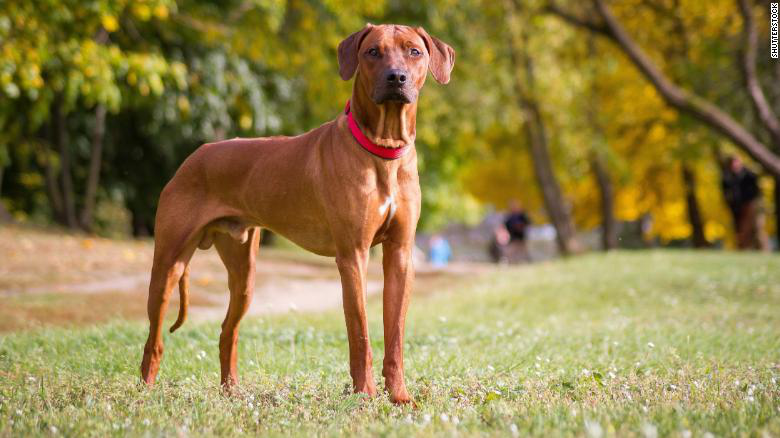

In [79]:
image = Image.open("201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg")
image

Dapat dilihat bahwa file gambar yang telah di download menggunakan command ***! wget*** berhasil muncul dengan baik

Selanjutnya untuk melakukan proses pengolahan data, kita harus mengubah file yang awalnya gambar menjadi ***array***

In [80]:
img_array = np.asarray(image)

In [81]:
img_array

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

In [82]:
print("Ukuran : " ,img_array.shape)
print("Dimensi : ",img_array.ndim)

Ukuran :  (438, 780, 3)
Dimensi :  3


Disini bisa dilihat bahwa gambar yang kita pakai di awal memiliki ukuran array sebesar $(438, 780, 3)$ dan memiliki Dimensi sebesar $3$

## **Data Preprocessing**

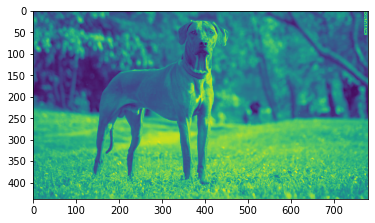

In [83]:
image_c = image.convert('L')
plt.imshow(image_c)

Langkah awal yaitu kita lakukan ***convert*** image menggunakan ***image.convert*** dan hasilnya bisa dilihat pada gambar di atas

In [84]:
image_c_array = np.asarray(image_c)
print(image_c_array)

[[ 85  85  83 ...  40  38  51]
 [ 76  76  75 ...  38  56  29]
 [ 64  65  65 ...  48  36  60]
 ...
 [150 144 134 ... 136 135 131]
 [149 142 132 ... 141 139 134]
 [149 142 131 ... 146 143 136]]


In [85]:
print(image_c_array.shape)
print(image_c_array.ndim)

(438, 780)
2


Disini bisa dilihat untuk ukuran array baru dari gambar yang telah di convert menjadi ***greyscale***

Array baru ini berukuran $(438,738)$ dan ber dimensi $2$

## **Image Processing**

Untuk proses ***Image Processing*** ini kita bisa melakukan dengan menggunakan turunan parsial dari array baru yang telah didefinisikan sebelumnya

Untuk melakukan turunan parsial, kita bisa menggunakan rumus berikut

\begin{align} 
\frac{\partial I}{\partial x} dan \frac{\partial I}{\partial y} 
\end{align}

In [86]:
x = np.arange(0,438)  #baris
y = np.arange(0,780)  #kolom
z = image_c_array

In [87]:
#Hitung turunan parsial
dx,dy = np.gradient(z)

In [88]:
print(" dx : ", dx.shape)
print(" dy : ",dy.shape)

 dx :  (438, 780)
 dy :  (438, 780)


In [89]:
#calculating first-order partial derivative expession:
print("dx \n", dx)
print("\n dy \n", dy)

dx 
 [[ -9.   -9.   -8.  ...  -2.   18.  -22. ]
 [-10.5 -10.   -9.  ...   4.   -1.    4.5]
 [ -9.   -9.   -8.  ... 107.5 -14.   20. ]
 ...
 [ -0.5  -2.   -2.5 ...   2.    1.5   1. ]
 [ -0.5  -1.   -1.5 ...   5.    4.    2.5]
 [  0.    0.   -1.  ...   5.    4.    2. ]]

 dy 
 [[  0.   -1.   -2.5 ...  -1.5   5.5  13. ]
 [  0.   -0.5  -1.  ...   6.   -4.5 -27. ]
 [  1.    0.5   0.5 ...  -3.    6.   24. ]
 ...
 [ -6.   -8.   -9.5 ...   1.   -2.5  -4. ]
 [ -7.   -8.5  -8.5 ...   0.5  -3.5  -5. ]
 [ -7.   -9.   -9.  ...  -0.5  -5.   -7. ]]


Setelah kita menemukan nilai dari turunan parsialnya, selanjutnya kita gunakan rumus ***Gradient Magnitude***

\begin{align}
mag=\sqrt{(\frac{\partial I}{\partial x})^2 + (\frac{\partial I}{\partial y})^2}
\end{align}

In [90]:
def mag(x,y):
    mag = []
    for dx,dy in zip(x,y):
        T = np.sqrt((dx*dx)+(dy*dy))
        mag.append(list(T))

    mag = np.array(mag)
    return mag

magnitude = mag(dx,dy)
magnitude

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

In [91]:
# calculating the gradient magnitude
magnitude = np.sqrt(dx**2 + dy**2)

Untuk mendeteksi tepi, kita bisa cek nilai magnitude

Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi (Biasanya threshold ~ $30$)


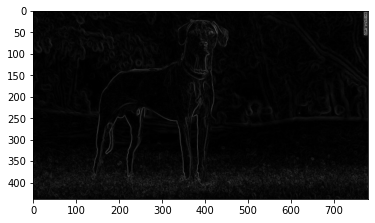

In [93]:
image_edge = Image.fromarray(magnitude)  #magnitude = 30
plt.imshow(image_edge)

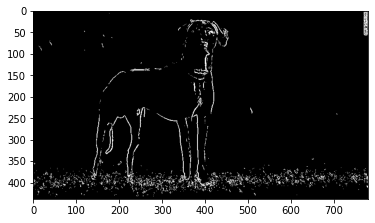

In [94]:
image_edge = Image.fromarray(magnitude > 30) #magnitude > 30
plt.imshow(image_edge)

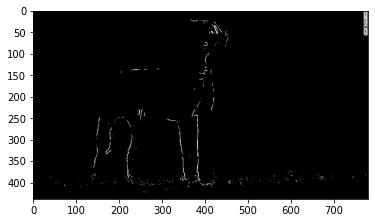

In [95]:
image_edge = Image.fromarray(magnitude > 50) #magnitude > 50
plt.imshow(image_edge)

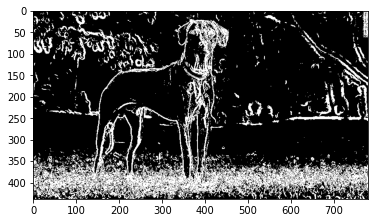

In [96]:
image_edge = Image.fromarray(magnitude > 10) #magnitude > 10
plt.imshow(image_edge)

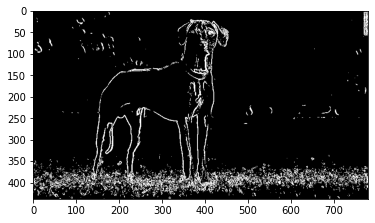

In [97]:
image_edge = Image.fromarray(magnitude > 20) #magnitude > 20
plt.imshow(image_edge)

Selanjutnya untuk ***Transformasi Linier*** kita akan melakukan rotasi dari $30$ derajat sampai $270$ derajat

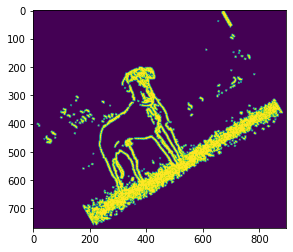

In [98]:
rotate_30 = ndimage.rotate(image_edge, 30, reshape=True)
plt.imshow(rotate_30)

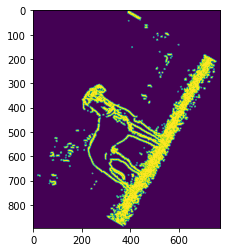

In [99]:
rotate_60 = ndimage.rotate(image_edge, 60, reshape=True)
plt.imshow(rotate_60)

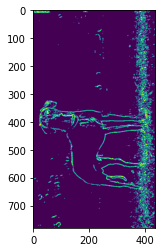

In [100]:
rotate_90 = ndimage.rotate(image_edge, 90, reshape=True)
plt.imshow(rotate_90)

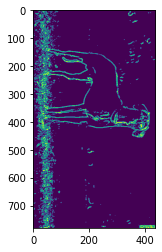

In [101]:
rotate_270 = ndimage.rotate(image_edge, 270, reshape=True)
plt.imshow(rotate_270)

## **Kesimpulan**

Untuk hasil deteksi tepi paling jelas dari $5$ percobaan yang dilakukan, percobaan dengan magnitude > 20 memberikan deteksi tepi paling jelas

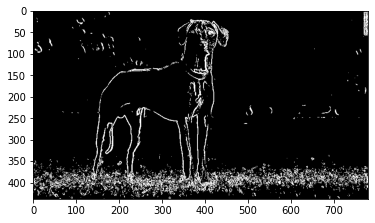

In [102]:
image_edge = Image.fromarray(magnitude > 20) #magnitude > 20
plt.imshow(image_edge)

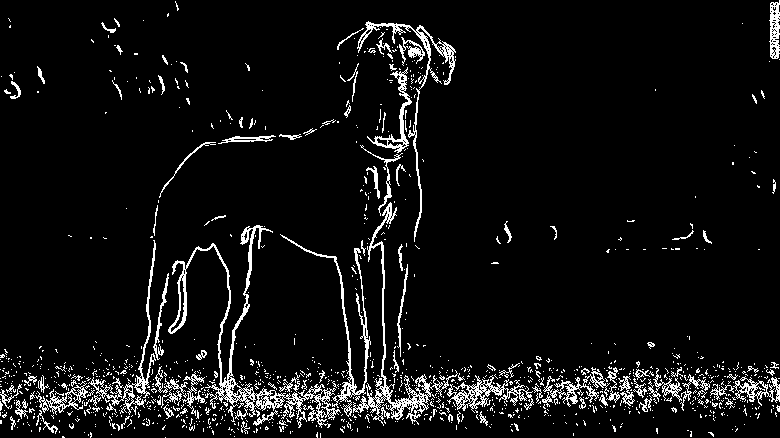

In [103]:
hasil_akhir = image_edge.convert('L')
hasil_akhir

Disini karena deteksi tepi sudah jelas, maka selanjutnya kita simpan ke dalam sebuah file baru menggunakan fungsi save

In [104]:
hasil_akhir.save('hasil_akhir.jpg')

Untuk melakukan rotasi dari sebuah gambar, kita bisa menggunakan fungsi ***ndimage.rotate*** dan menuliskan sebesar berapa kita ingin merotasi

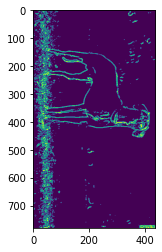

In [105]:
rotate_270 = ndimage.rotate(image_edge, 270, reshape=True)
plt.imshow(rotate_270)